In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuscenes.nuscenes import NuScenes
import nuscenes.utils.nb_utils as nbutils

import numpy as np
import matplotlib.pyplot as plt

nusc = NuScenes(version='v1.0', dataroot='/home/noam/nuscenes/full_data_set', verbose=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
scene_id = 'a5d7cc4bf3404cccb89932d94ccb9da6'
my_scene = nusc.get('scene', scene_id)
my_scene

{'token': 'a5d7cc4bf3404cccb89932d94ccb9da6',
 'log_token': '7a0fde44c3504eaeb18f9ad83bed65bc',
 'nbr_samples': 40,
 'first_sample_token': 'ff3e47f0101749cb995e64f97d237305',
 'last_sample_token': 'ea0fd790654b417fa8501ed27691e470',
 'name': 'scene-0069',
 'description': 'Turn left, peds near parked bus, bird'}

0.13887002227033918


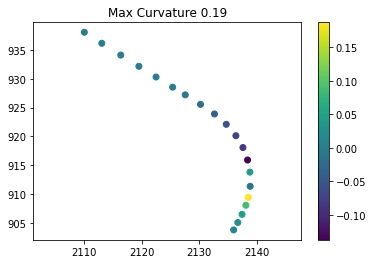

In [4]:
## Getting a weird warning "RuntimeWarning: divide by zero encountered in true_divide"

pose_array = nbutils.get_ego_positions_from_scene(nusc, my_scene)
curvature = nbutils.compute_curvature_from_array(pose_array)
dx = np.gradient(pose_array[0,:])
#     pose_array = pose_array[:,curvature<.5]
#     curvature = curvature[curvature<.5]
print(np.min(np.abs(dx)))
pose_array = pose_array[:,np.abs(dx)>1e-4]
curvature = curvature[np.abs(dx)>1e-4]


max_curv, min_curv = np.max(curvature), np.min(curvature)
max_curv_mid, min_curv_mid = np.max(curvature[5:-5]), np.min(curvature[5:-5])

plt.title('Max Curvature %.02f'%max_curv)
turn_frame_start = 0
turn_frame_end = 20

plt.scatter(pose_array[0,turn_frame_start:turn_frame_end], 
            pose_array[1,turn_frame_start:turn_frame_end],
            c=curvature[turn_frame_start:turn_frame_end])
ax = plt.gca()
ax.axis('equal')

plt.colorbar()
plt.show()    

In [5]:
location = nusc.get('log',my_scene['log_token'])['location']

Sample Number 1


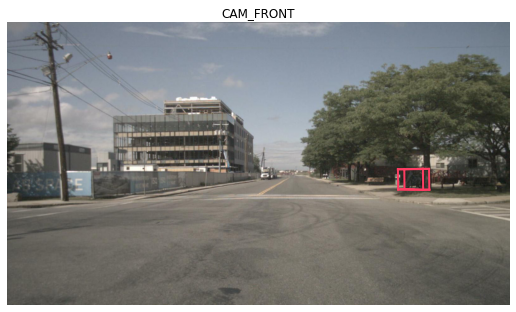

Sample Number 2


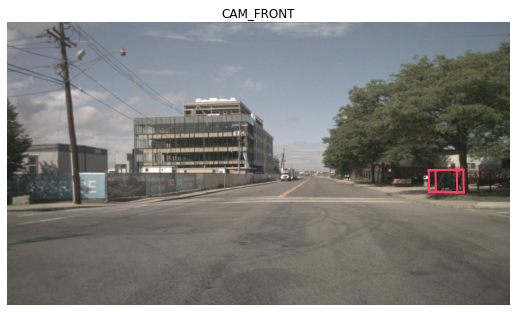

Sample Number 3


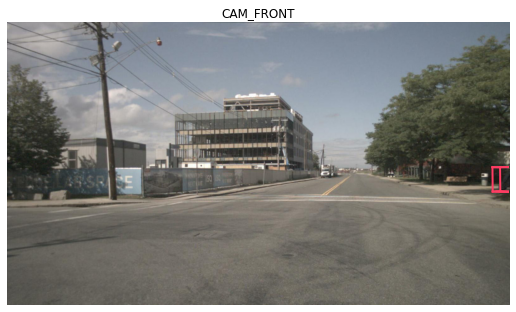

Sample Number 4


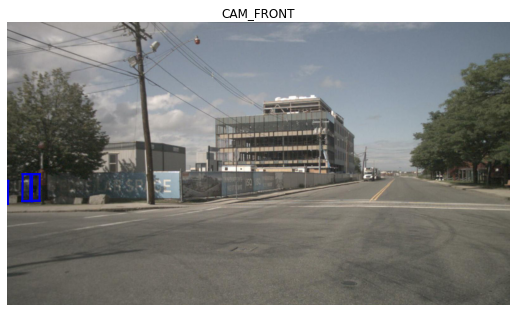

Sample Number 5


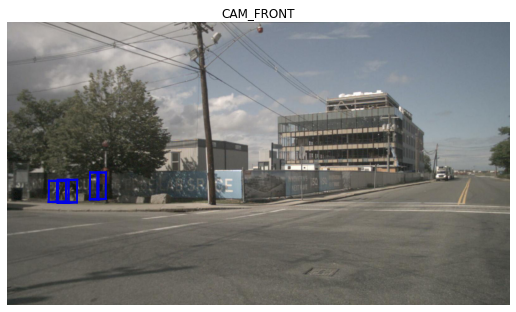

Sample Number 6


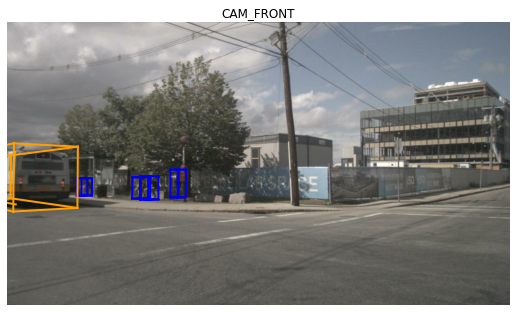

Sample Number 7


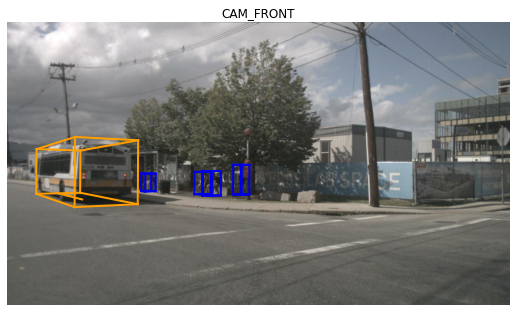

Sample Number 8


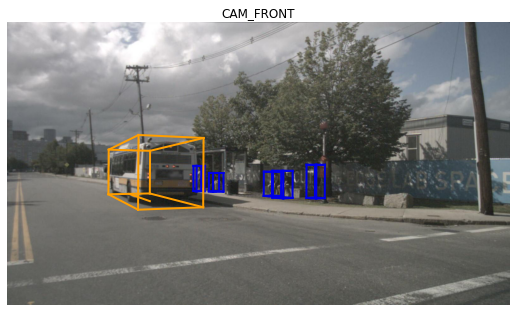

Sample Number 9


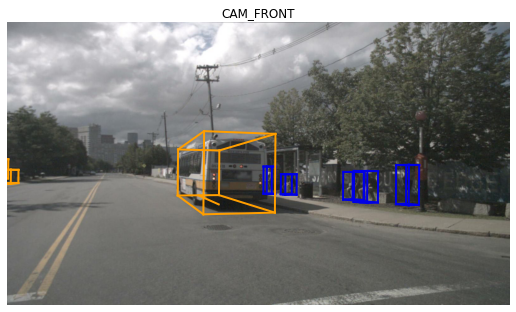

Sample Number 10


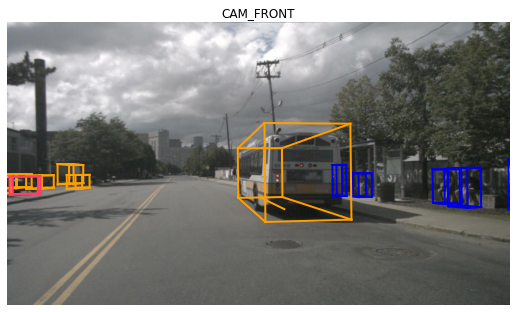

Sample Number 11


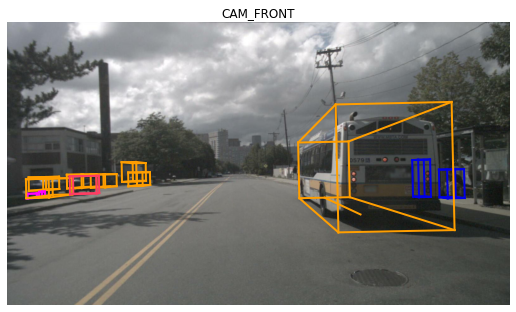

Sample Number 12


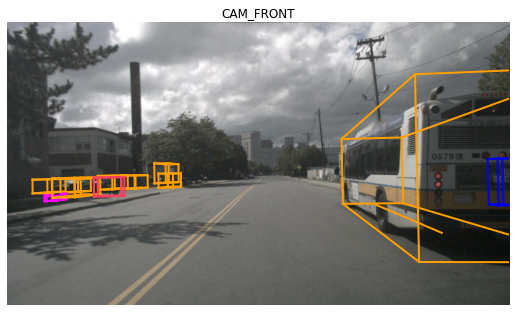

Sample Number 13


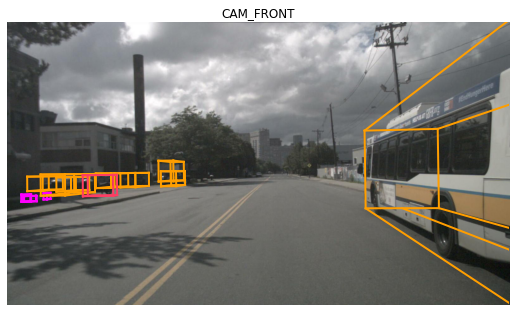

Sample Number 14


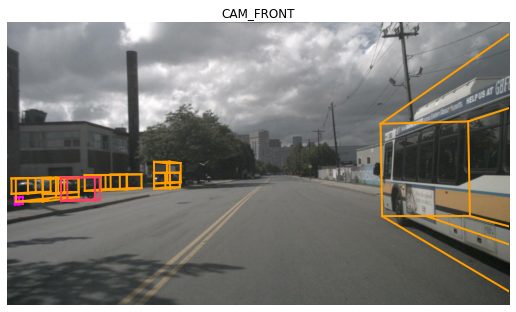

Sample Number 15


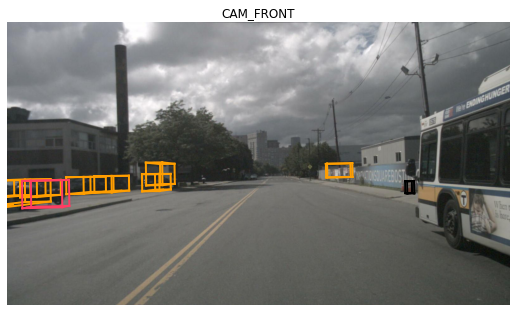

Sample Number 16


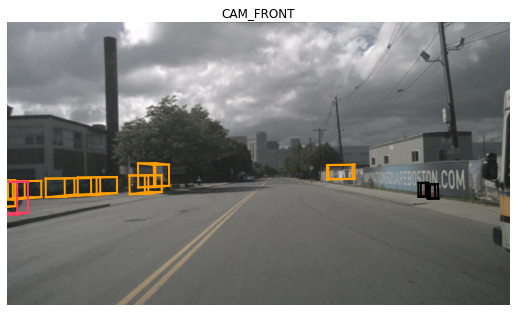

Sample Number 17


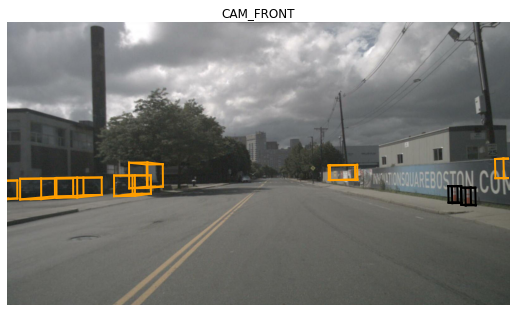

Sample Number 18


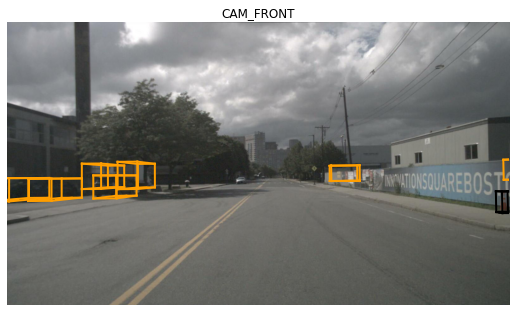

Sample Number 19


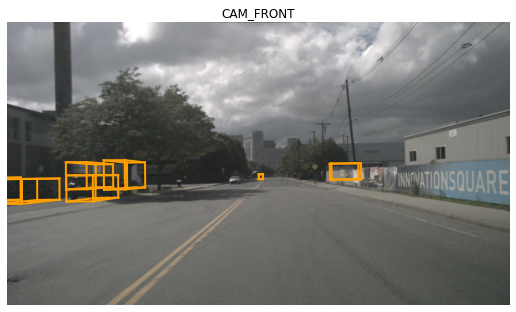

Sample Number 20


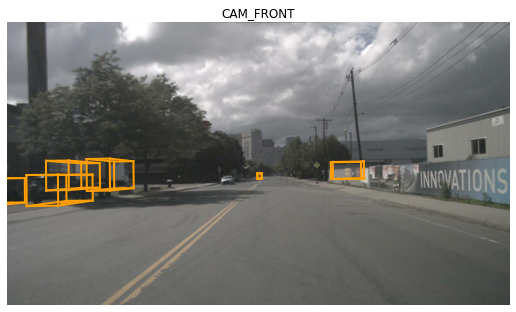

In [6]:
sample_token = my_scene['first_sample_token']
sample = nusc.get('sample',sample_token)
sensor = 'CAM_FRONT'
sample_number = 0
while sample['next'] != '':
    sample = nusc.get('sample', sample['next'])
    sample_number += 1        
    if sample_number >= turn_frame_start and sample_number<=turn_frame_end:    
        print("Sample Number %d"%sample_number)
        cam_front_data = nusc.get('sample_data', sample['data'][sensor])

        nusc.render_sample_data(cam_front_data['token'])
        plt.show()


### Let's try to recreate a birdseye turn for Sample Number 4

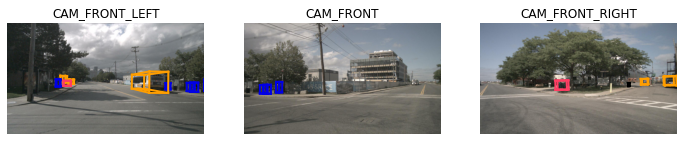

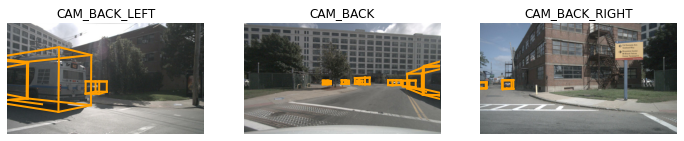

In [7]:
sample_token = '2e55334cd46a498d8bf05d801a795191'
sample = nusc.get('sample',sample_token)
# print("Scene %d/%d.  Location: %s"%(scene_counter, number_scenes, location))
fig, axs = plt.subplots(1, 3, figsize=[12,6])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_FRONT_LEFT'])['token'], with_anns=True, ax = axs[0])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_FRONT'])['token'], with_anns=True, ax = axs[1])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_FRONT_RIGHT'])['token'], with_anns=True, ax = axs[2])
plt.show()

fig, axs = plt.subplots(1, 3, figsize=[12,6])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_BACK_LEFT'])['token'], with_anns=True, ax = axs[0])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_BACK'])['token'], with_anns=True, ax = axs[1])
nusc.render_sample_data(nusc.get('sample_data', sample['data']['CAM_BACK_RIGHT'])['token'], with_anns=True, ax = axs[2])
plt.show()
# cam_front_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])
# nusc.render_sample_data(cam_front_data['token'])

In [17]:
nusc.get('sample_data',sample_token)

KeyError: '2e55334cd46a498d8bf05d801a795191'

(0, 0, 230)


ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

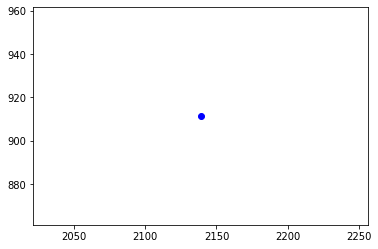

In [13]:
ego_pose_token = nusc.get('sample_data', sample['data']['LIDAR_TOP'])['ego_pose_token']
ego_pose = nusc.get('ego_pose', ego_pose_token)['translation']
plt.scatter(ego_pose[0], ego_pose[1],color = 'blue')
for annotation_token in sample['anns']:
    annotation = nusc.get('sample_annotation', annotation_token)
    annotation_color = nusc.explorer.get_color(annotation['category_name'])
    print(annotation_color)
    plt.scatter(annotation['translation'][0], annotation['translation'][1], color = np.array(annotation_color))

plt.show()

In [22]:
sample['data']['LIDAR_TOP']

'9ed8450489c04badbb62d655ce653908'

In [28]:
from nuscenes.utils.geometry_utils import view_points, box_in_image, BoxVisibility, transform_matrix

_, boxes, _ = nusc.get_sample_data(sample['data']['LIDAR_TOP'], box_vis_level=BoxVisibility.ANY,
                                                    use_flat_vehicle_coordinates=True)

In [29]:
boxes

[label: nan, score: nan, xyz: [26.05, 10.47, 1.05], wlh: [0.67, 0.61, 1.65], rot axis: [0.00, 0.00, 1.00], ang(degrees): 159.85, ang(rad): 2.79, vel: nan, nan, nan, name: human.pedestrian.adult, token: dac557a396094c6bb4e79e8e318bac1a,
 label: nan, score: nan, xyz: [27.19, 13.58, 0.68], wlh: [0.73, 0.67, 1.37], rot axis: [0.00, 0.00, 1.00], ang(degrees): 164.59, ang(rad): 2.87, vel: nan, nan, nan, name: human.pedestrian.adult, token: 6c4b600ebfae4f54b80139d41ab021a9,
 label: nan, score: nan, xyz: [-59.46, -0.55, 0.95], wlh: [2.01, 4.76, 1.73], rot axis: [0.00, 0.00, -1.00], ang(degrees): 174.74, ang(rad): 3.05, vel: nan, nan, nan, name: vehicle.car, token: ce781830bb3c4212b6f898355a4dcf71,
 label: nan, score: nan, xyz: [28.71, 18.71, 0.62], wlh: [0.74, 0.73, 1.23], rot axis: [0.00, 0.00, 1.00], ang(degrees): 149.90, ang(rad): 2.62, vel: nan, nan, nan, name: human.pedestrian.adult, token: 093eb7c3e338423eb8e154a67bb6273b,
 label: nan, score: nan, xyz: [-46.78, 6.67, 1.69], wlh: [2.64, 8

In [86]:
annotation

{'token': 'dac557a396094c6bb4e79e8e318bac1a',
 'sample_token': '2e55334cd46a498d8bf05d801a795191',
 'instance_token': 'df24b66790a2438d882cbae8d3afe32e',
 'visibility_token': '4',
 'attribute_tokens': ['4d8821270b4a47e3a8a300cbec48188e'],
 'translation': [2130.428, 938.114, 1.051],
 'size': [0.674, 0.609, 1.653],
 'rotation': [-0.540144850580235, 0.0, 0.0, 0.8415720648831303],
 'prev': '8efcc7a1791f4d62800a91571e60ec39',
 'next': '6f1de42c171f40db96442595628928df',
 'num_lidar_pts': 4,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

In [91]:
ego = nusc.get('ego_pose', ego_pose_token)
ego

{'token': '9ed8450489c04badbb62d655ce653908',
 'timestamp': 1533153482696355,
 'rotation': [-0.7341042099737416,
  -0.0002788307532042951,
  0.007834865811964242,
  -0.6789915655072221],
 'translation': [2138.8339509246885, 911.3270690886835, 0.0]}

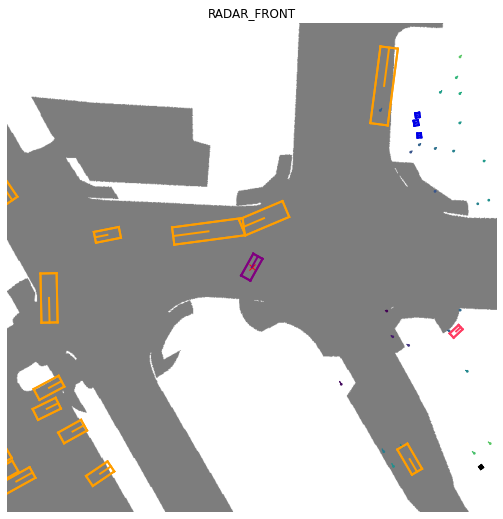

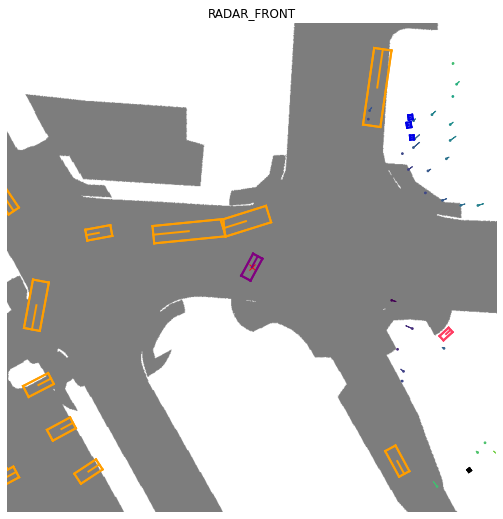

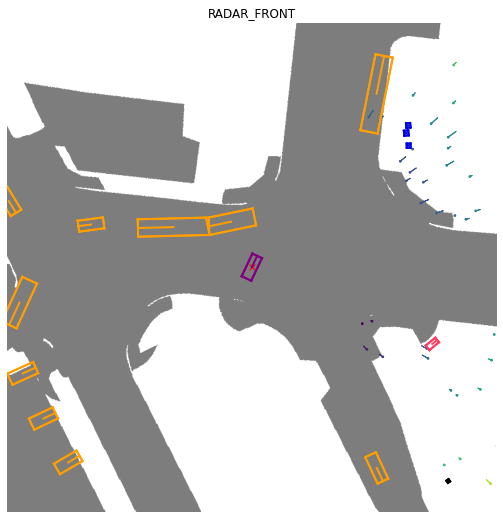

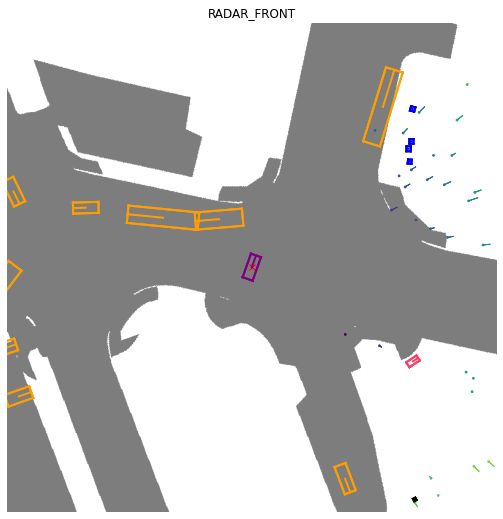

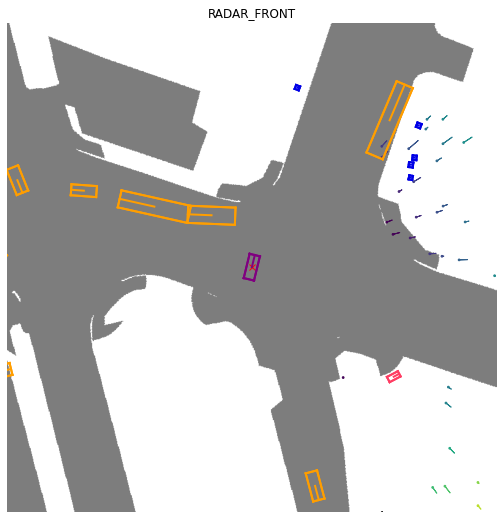

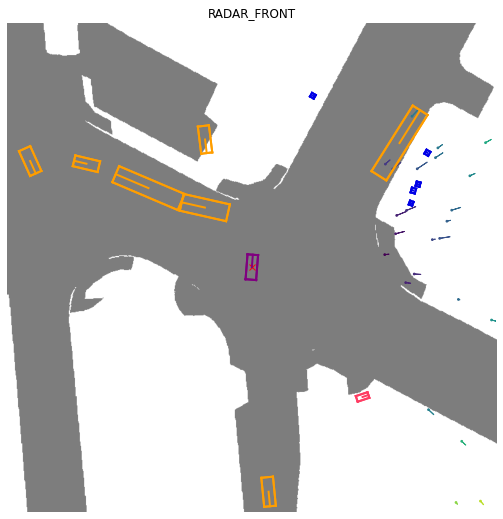

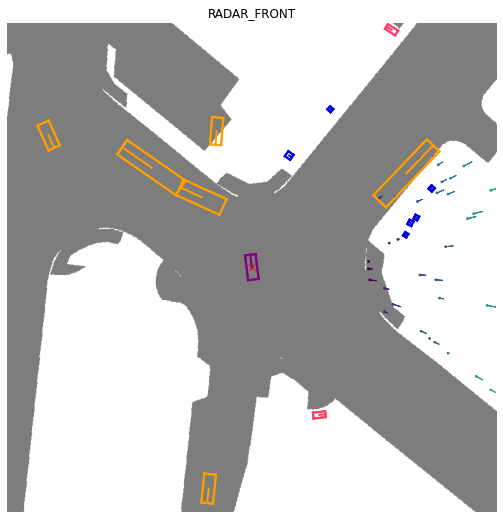

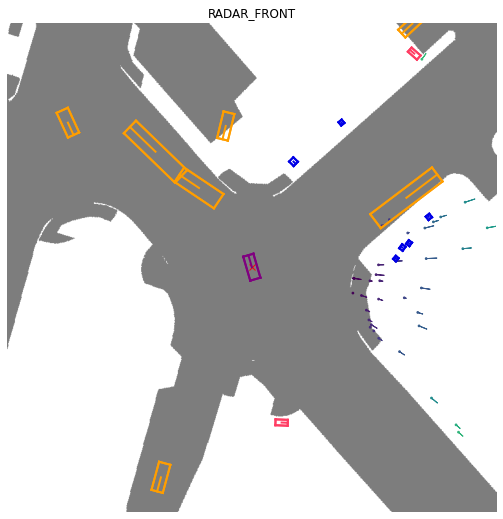

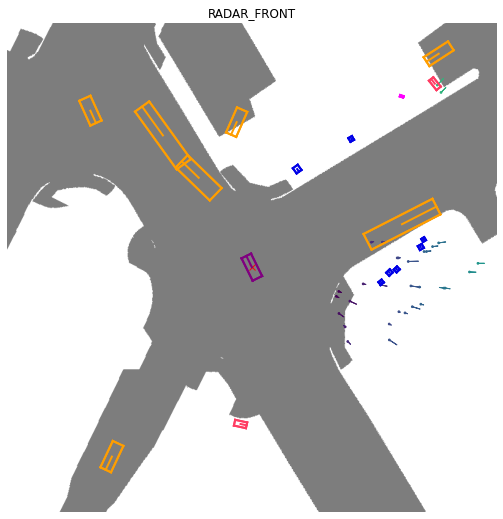

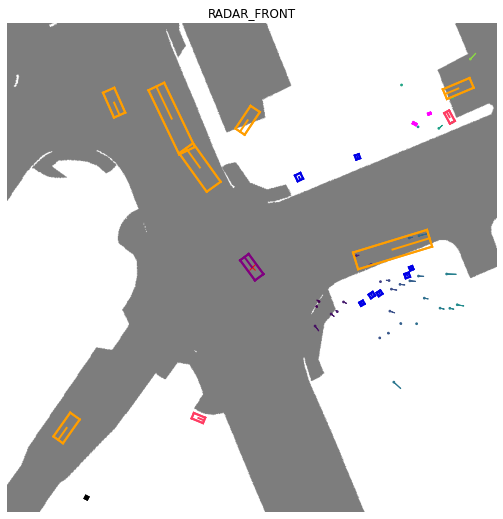

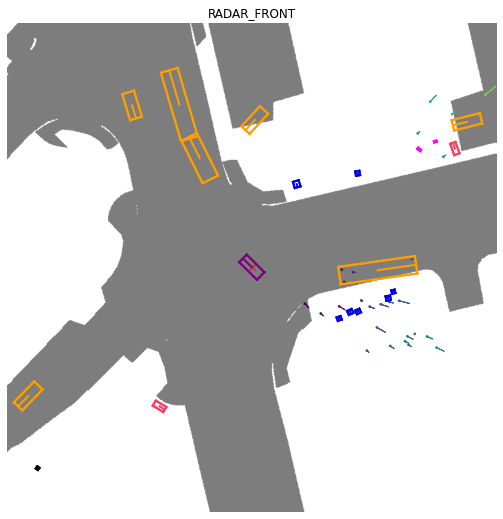

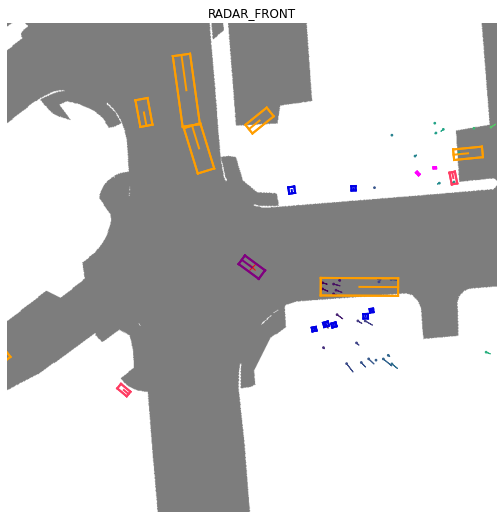

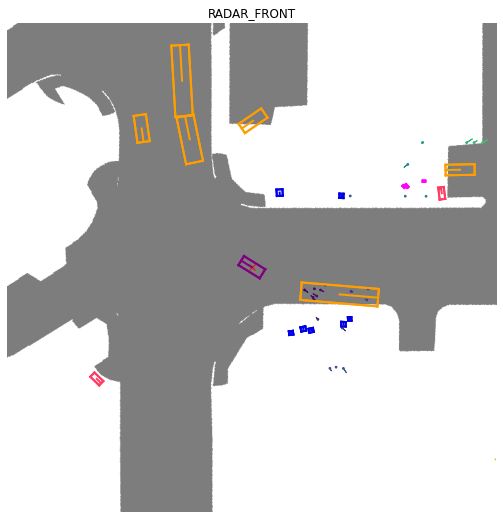

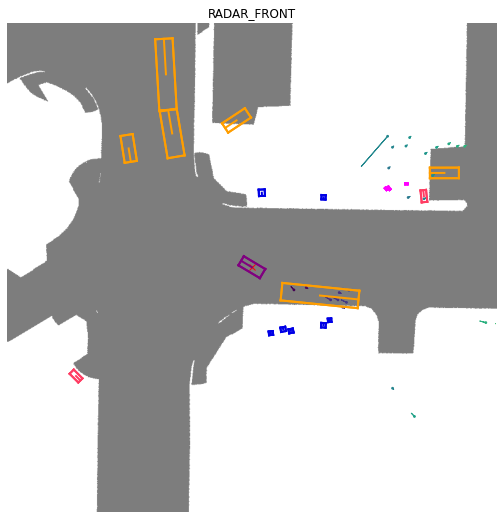

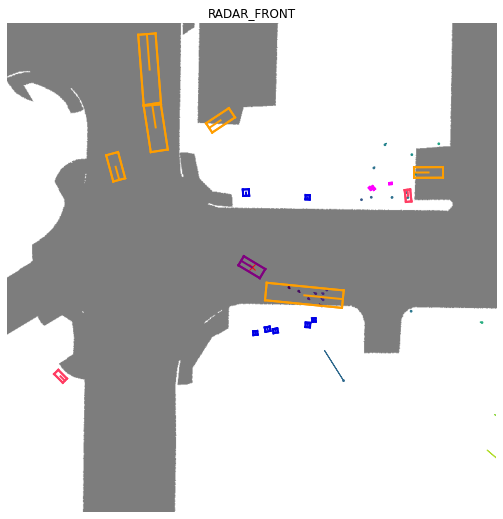

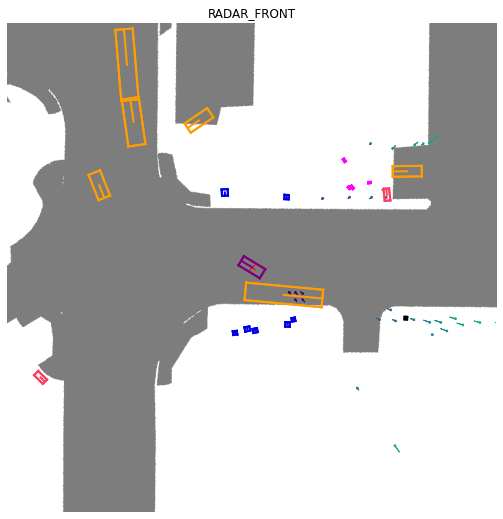

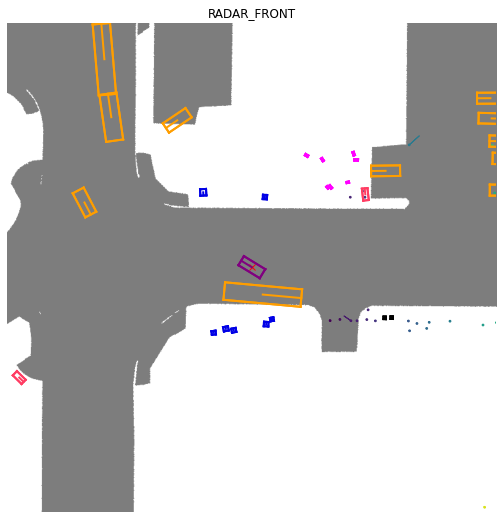

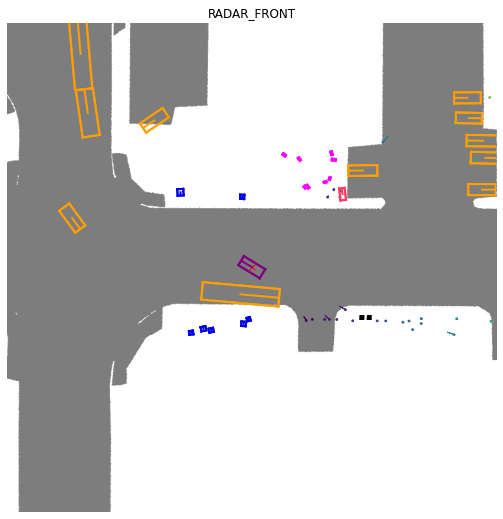

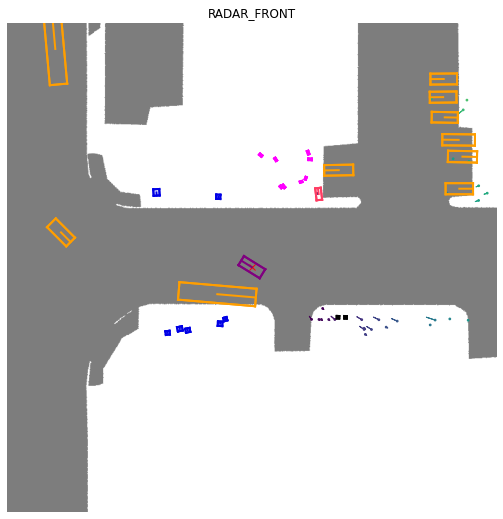

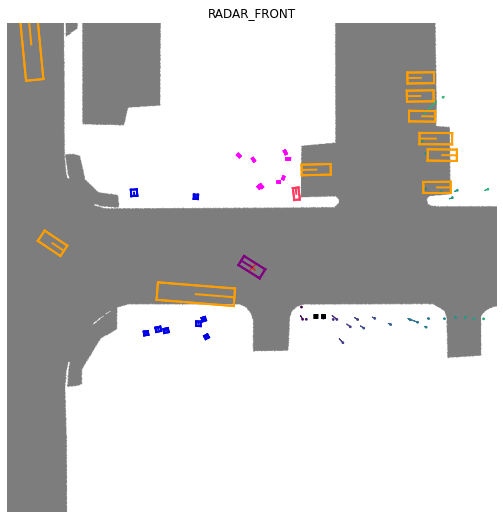

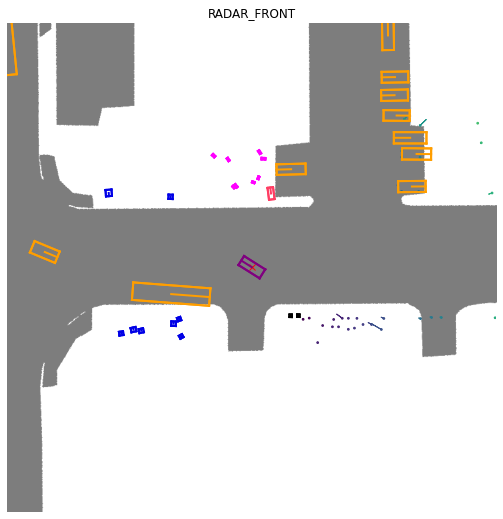

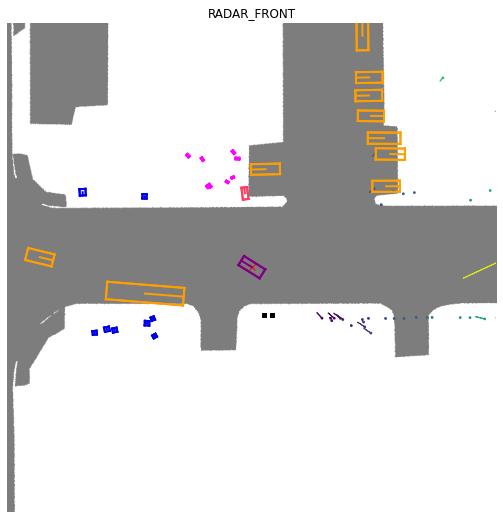

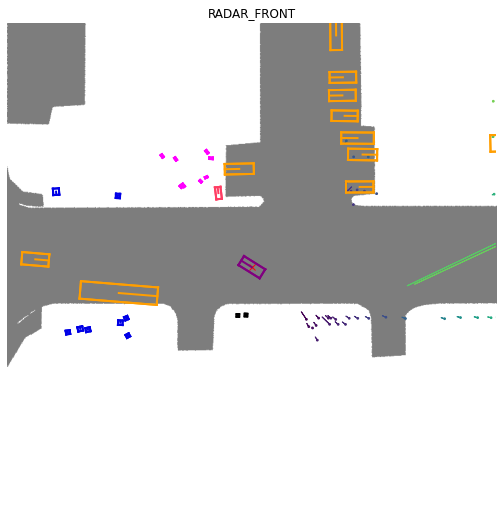

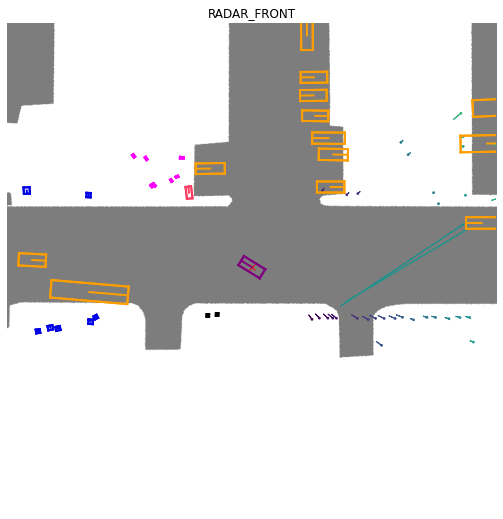

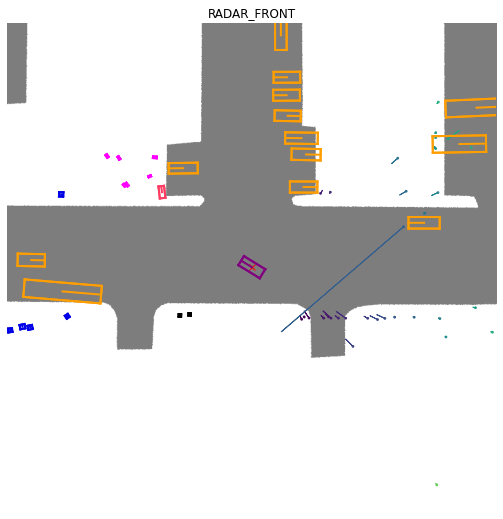

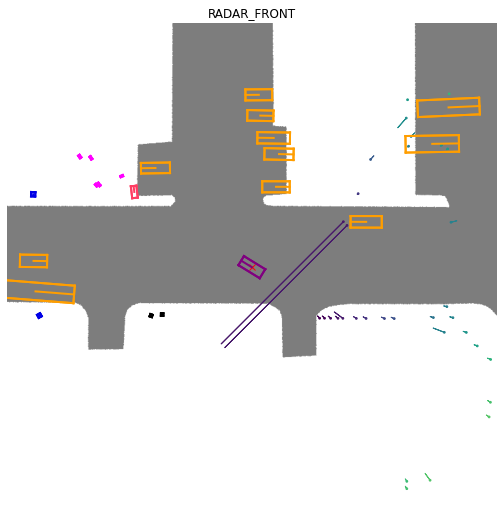

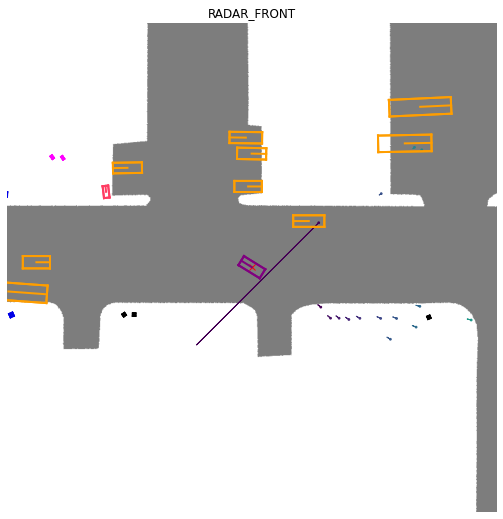

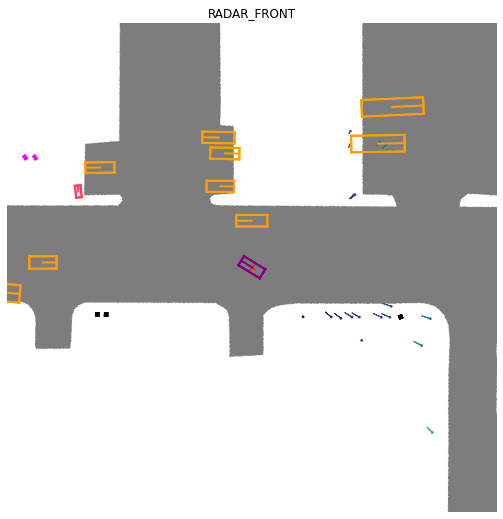

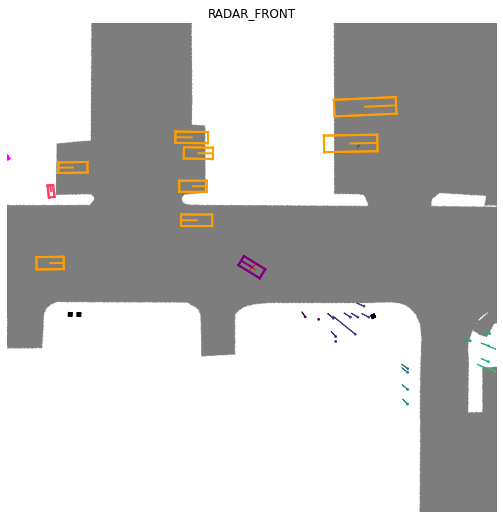

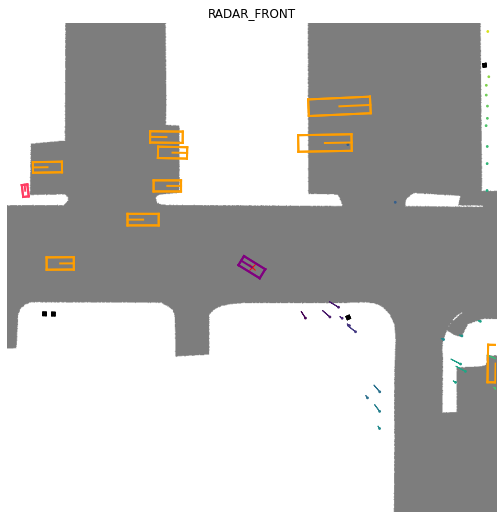

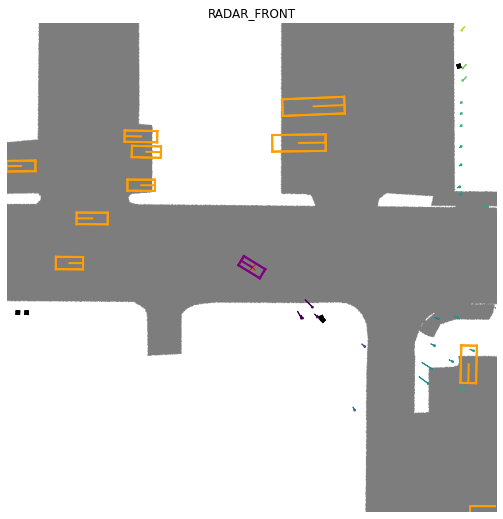

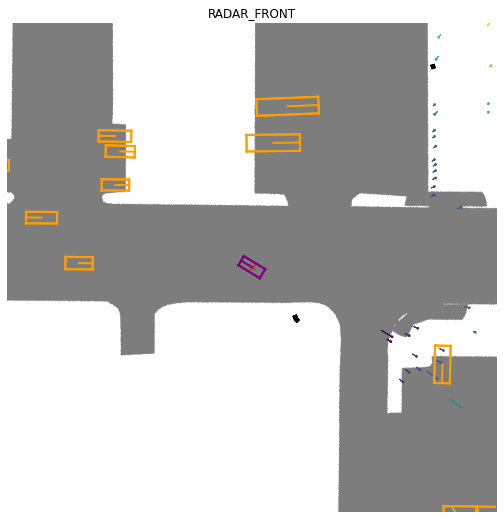

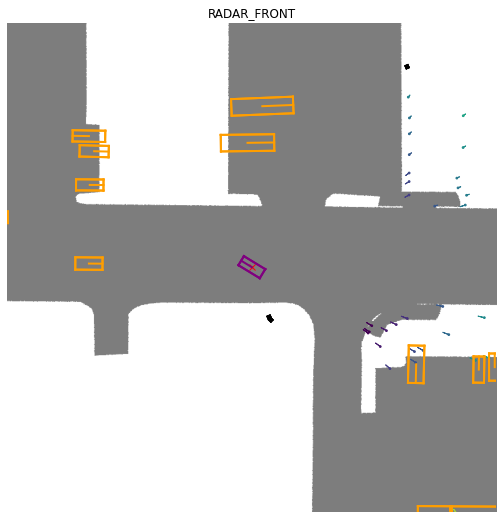

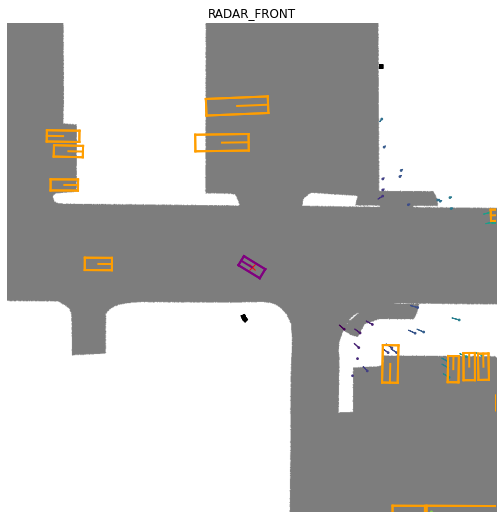

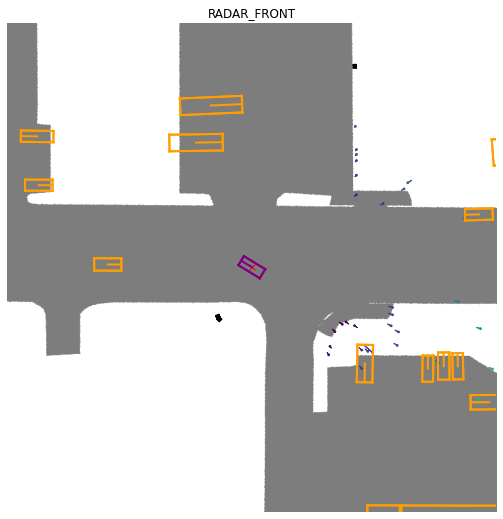

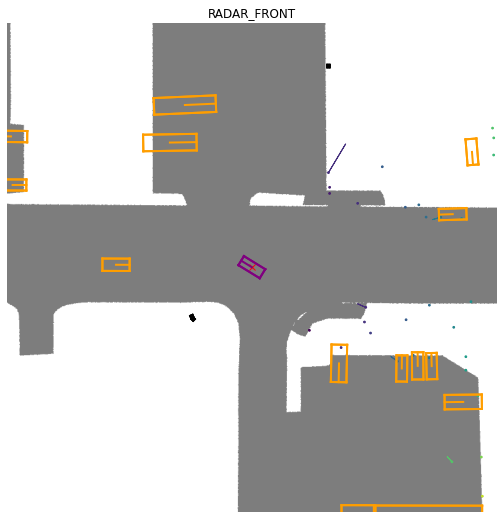

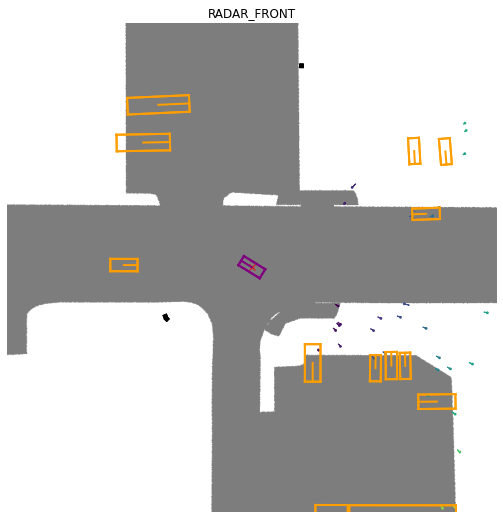

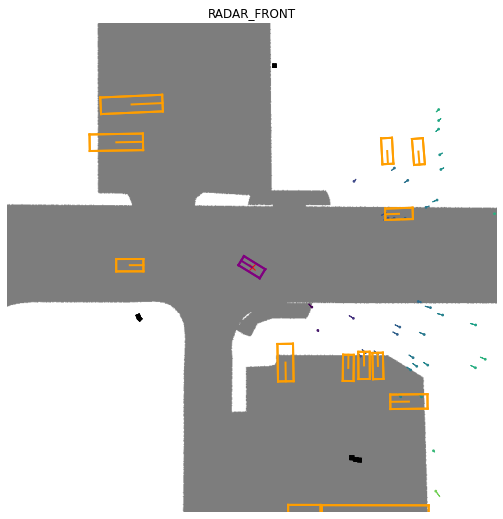

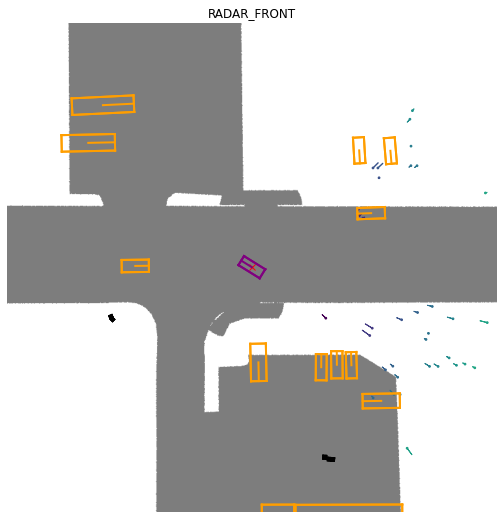

In [99]:
sample = nusc.get('sample', my_scene['first_sample_token'])
# nusc.render_sample_data(sample['data']['RADAR_FRONT'], nsweeps=1, underlay_map=True)
# plt.show()

while sample['next'] != '':
    nusc.render_sample_data(sample['data']['RADAR_FRONT'], nsweeps=1, underlay_map=True, )
    plt.show()
    
    sample = nusc.get('sample', sample['next'])

{'token': '1fa93b757fc74fb197cdd60001ad8abf', 'name': 'human.pedestrian.adult', 'description': 'Adult subcategory.'}
[[2130.428  938.114]
 [2130.428  938.114]
 [2130.428  938.114]
 [2130.428  938.114]
 [2130.424  938.105]
 [2130.419  938.096]
 [2130.415  938.087]
 [2130.411  938.078]
 [2130.411  938.078]
 [2130.411  938.078]]
{'token': '1fa93b757fc74fb197cdd60001ad8abf', 'name': 'human.pedestrian.adult', 'description': 'Adult subcategory.'}
[[2127.414  939.485]
 [2127.412  939.48 ]
 [2127.41   939.475]
 [2127.409  939.471]
 [2127.407  939.466]
 [2127.405  939.461]
 [2127.403  939.456]
 [2127.401  939.451]
 [2127.401  939.45 ]
 [2127.401  939.45 ]]
{'token': 'fd69059b62a3469fbaef25340c0eab7f', 'name': 'vehicle.car', 'description': 'Vehicle designed primarily for personal use, e.g. sedans, hatch-backs, wagons, vans, mini-vans, SUVs and jeeps. If the vehicle is designed to carry more than 10 people use vehicle.bus. If it is primarily designed to haul cargo use vehicle.truck. '}
[[2134.77 

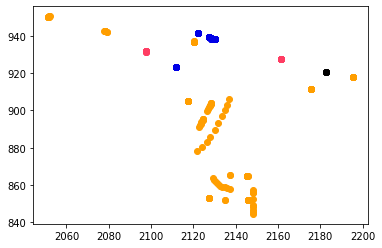

In [83]:
from nuscenes.prediction import PredictHelper
helper = PredictHelper(nusc)
sample = nusc.get('sample', '2e55334cd46a498d8bf05d801a795191')

for ann in sample['anns']:
    instance_token = nusc.get('sample_annotation', ann)['instance_token']   
    instance = nusc.get('instance', instance_token)
    sample_token = sample['token']
#     print(sample_token, instance_token)
    future_xy_local = helper.get_future_for_agent(instance_token, sample_token, seconds=5, in_agent_frame=False)
    if future_xy_local.shape[0] > 0:
        category = nusc.get('category', instance['category_token'])
        print(category)
        color = nusc.explorer.get_color(category['name'])
        plt.scatter(future_xy_local[:,0], future_xy_local[:,1], color=np.array(color)/255)
    print(future_xy_local)
plt.show()

In [81]:
future_xy_local[:,0]

array([2097.446, 2097.418, 2097.418, 2097.418, 2097.432, 2097.446])

In [ ]:
 'bicycle' 'motorcycle'  # Red
 'vehicle' ['bus', 'car', 'construction_vehicle', 'trailer', 'truck']: # Orange
 'pedestrian'   # Blue
 'cone' 'barrier' # Black
else:
    return 255, 0, 255  # Magenta

In [ ]:
## Make a version of render_sample_data that keeps the map static but the objects keep moving

In [85]:
location

'boston-seaport'

In [ ]:
nusc.render_egoposes_on_map(log_location=location)

In [66]:
instance

{'token': 'df24b66790a2438d882cbae8d3afe32e',
 'category_token': '1fa93b757fc74fb197cdd60001ad8abf',
 'nbr_annotations': 28,
 'first_annotation_token': '0cdd53e81dee4af695b8c7f6096b7176',
 'last_annotation_token': 'ccc13ef2cfe94cabb331255d3105407d'}